# Mental Health Analysis
This study examines Suicide Rates in 2023, determines statistical significant predictor variables, and policy recommendations based on findings. Suicide rates have increased for a majority of years throughout the past few decades according to the center for disease control (CDC). This increase is a cause for concern and research to aid in public policy evaluation/implimentation. As a result, this Empirical Analysis was conducted to determine key predictors to help recommend policy advancements.

In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

### Data Cleaning

In [18]:
Gunlaws         = pd.read_csv("GunLaw2023.csv")
HealthCoverage  = pd.read_csv("C://Users//Nicho//OneDrive//Desktop//Empirical Analysis//HealthcareCoverage2023.csv")
MedicalExpense  = pd.read_csv("C://Users//Nicho//OneDrive//Desktop//Empirical Analysis//MedicalExpense2023.csv")
PerCapitaIncome = pd.read_csv("C://Users//Nicho//OneDrive//Desktop//Empirical Analysis//PerCapitaIncome2023.csv")
StateSpending   = pd.read_csv("C://Users//Nicho//OneDrive//Desktop//Empirical Analysis//StateSpending2023.csv")
SuicideRate     = pd.read_csv("C://Users//Nicho//OneDrive//Desktop//Empirical Analysis//SuicideRates2023.csv")

In [20]:
Step1 = pd.merge(SuicideRate, StateSpending, on = 'state', how = 'inner')
Step2 = pd.merge(Step1, PerCapitaIncome, on = 'state', how = 'inner')
Step3 = pd.merge(Step2, MedicalExpense, on = 'state', how = 'inner')
Step4 = pd.merge(Step3, HealthCoverage, on = 'state', how = 'inner')
Data = pd.merge(Step4, Gunlaws, on = 'state', how = 'inner')

In [23]:
Data = Data.rename(columns={ 'Age Adjusted Rate':'SuicideRate', 
                     'Total State Expenditures (in millions)': 'StateSpending',
                     'Expenses per Inpatient Day' : 'MedicalExpense',
                     'Non-Group' : 'Non_Group'} )

In [35]:
Data.to_csv("cleaned_state_data.csv", index=False) # exporting data to fix numerical issues in excel

In [92]:
CleanedData = pd.read_csv("C://Users//Nicho//Downloads//CleanedData.csv")
CleanedData.columns = CleanedData.columns.str.strip() 

In [116]:
# Standardizing numeric variables to fix scaling differences
target = 'SuicideRate'

numeric_cols = CleanedData.select_dtypes(include=['number']).columns

predictors = [col for col in numeric_cols if col != target]
# Deaths and PerCapitaIncome are removes for multicollinearity issues
predictors.remove('Deaths')
predictors.remove('PerCapitaIncome')

formula = f"{target} ~ {' + '.join(predictors)}"

Data_std = CleanedData.copy() 
predictors.remove('gun_strength') 
Data_std[predictors] = CleanedData[predictors].apply(lambda x: (x - x.mean())/ x.std())
predictors.append('gun_strength')
# Standardization of gun strength is prevent to prevent interpretability issues

In [118]:
# all regression
lm = smf.ols(formula = formula, data = Data_std).fit(cov_type = 'HC3')
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            SuicideRate   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     6.624
Date:                Thu, 15 Jan 2026   Prob (F-statistic):           6.72e-06
Time:                        10:10:36   Log-Likelihood:                -117.27
No. Observations:                  50   AIC:                             256.5
Df Residuals:                      39   BIC:                             277.6
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.9916      1.713     

$$
\text{SuicideRate} = \beta_0 + \beta_1(\text{StateSpending}) + \beta_2(\text{Income})+ \beta_3(\text{MedicalExpense})+ \beta_3(\text{Uninsured}) + \beta_3(\text{GunStrength}) + \epsilon
$$

In [124]:
lm2 = smf.ols(formula = 'SuicideRate ~ StateSpending + HouseholdIncome + MedicalExpense + Uninsured + gun_strength', 
                       data = Data_std).fit(cov_type = 'HC3')
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:            SuicideRate   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     7.574
Date:                Thu, 15 Jan 2026   Prob (F-statistic):           3.34e-05
Time:                        10:53:51   Log-Likelihood:                -126.58
No. Observations:                  50   AIC:                             265.2
Df Residuals:                      44   BIC:                             276.6
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.7770      1.810     

$$
\begin{array}{rlccccccc}
\widehat{\text{SuicideRate}} = & 16.44 & - & 1.5858(\text{StateSpending}) & - & 0.4840(\text{Income}) \\
& (p=0.000) & & (p=0.291) & & (p=0.622) \\
\\
& + & 1.3684(\text{MedicalExpense}) & + & 0.8051(\text{Uninsured}) & + & 2.6370(\text{GunStrength}) \\
& & (p=0.023) & & (p=0.313) & & (p=0.010)
\end{array}
$$

In [128]:
lm3 = smf.ols(formula = 'SuicideRate ~ StateSpending + MedicalExpense + gun_strength', 
                       data = Data_std).fit(cov_type = 'HC3')
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:            SuicideRate   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     12.67
Date:                Thu, 15 Jan 2026   Prob (F-statistic):           3.65e-06
Time:                        11:04:32   Log-Likelihood:                -128.08
No. Observations:                  50   AIC:                             264.2
Df Residuals:                      46   BIC:                             271.8
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.4890      1.216      8.

$$
\begin{array}{rlccccccc}
\widehat{\text{SuicideRate}} = & 16.44 & - & 1.5858(\text{StateSpending}) \\
& (p=0.000) & & (p=0.286) \\
\\
& + & 1.3684(\text{MedicalExpense}) & + & 2.6370(\text{GunStrength}) \\
& & (p=0.039) & & (p=0.000)
\end{array}
$$

In [136]:
StateAge      = pd.read_csv("C://Users//Nicho//OneDrive//Desktop//Empirical Analysis//AgeData2023.csv")
StatePoverty  = pd.read_csv("C://Users//Nicho//OneDrive//Desktop//Empirical Analysis//PovertyData2023.csv")
StateRuralPop = pd.read_csv("C://Users//Nicho//OneDrive//Desktop//Empirical Analysis//RuralPopulationData2023.csv")

In [142]:
step1 = Data_std.copy()
step2 = pd.merge(step1,StateAge, on = 'State', how = 'inner')
step3 = pd.merge(step2,StatePoverty, on = 'State', how = 'inner')
TotalData = pd.merge(step3,StateRuralPop, on = 'State', how = 'inner')
TotalData.columns = TotalData.columns.str.strip() 

In [146]:
lm4 = smf.ols(formula = 'SuicideRate ~ StateSpending + MedicalExpense + gun_strength + PovertyRate + MedianAge + RuralPopulation', 
              data = TotalData).fit(cov_type = 'HC3')
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:            SuicideRate   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     7.630
Date:                Thu, 15 Jan 2026   Prob (F-statistic):           1.30e-05
Time:                        12:01:45   Log-Likelihood:                -126.55
No. Observations:                  50   AIC:                             267.1
Df Residuals:                      43   BIC:                             280.5
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          26.5056     10.232     

$$
\begin{array}{rlccccccc}
\widehat{\text{SuicideRate}} = & 26.5056 & - & 1.2075(\text{StateSpending}) & + & 1.0515(\text{MedicalExpense}) \\
& (p=0.010) & & (p=0.359) & & (p=0.240) \\
\\
& + & 0.1925(\text{GunStrength}) & - & 0.1097(\text{PovertyRate}) & - & 0.3950(\text{MedianAge}) & + & 0.0503(\text{RuralPopulation}) \\
& & (p=0.000) & & (p=0.791) & & (p=0.133) && (p=0.412)
\end{array}
$$

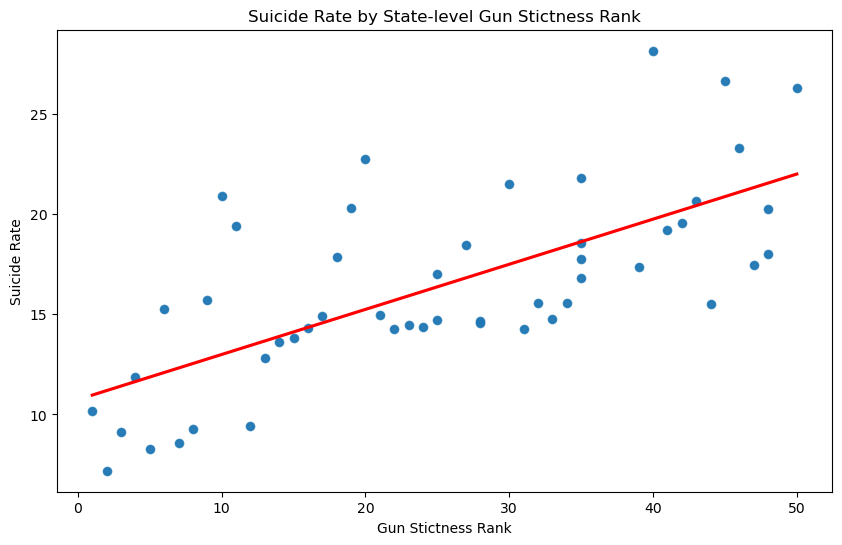

In [166]:
plt.figure(figsize = (10,6))
plt.scatter(x = TotalData['gun_strength'], y = TotalData['SuicideRate'],
            s = 20, alpha = 0.75)
sns.regplot(data=CleanedData, x='gun_strength', y='SuicideRate', line_kws={'color': 'red'},
           ci = 0)
plt.xlabel('Gun Stictness Rank')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rate by State-level Gun Stictness Rank')
plt.show()